Data Science Challenge 
Solutions: Christos Karapanagiotis 

In [37]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [38]:
#First we import the Data using pandas
import pandas as pd

higgs = pd.read_csv('/home/trolletarian/Downloads/atlas-higgs-challenge-2014-v2.csv',delimiter=",")

In [39]:
# Lets have a first look in the dataset

# Descriptive statistics that summarize the central tendency
higgs.describe()


EventId   DER_mass_MMC  DER_mass_transverse_met_lep  \
count  818238.000000  818238.000000                818238.000000   
mean   509118.500000     -48.819019                    49.252714   
std    236205.109118     406.118397                    35.378609   
min    100000.000000    -999.000000                     0.000000   
25%    304559.250000      78.166000                    19.304000   
50%    509118.500000     105.061000                    46.484000   
75%    713677.750000     130.730000                    73.620000   
max    918237.000000    1949.261000                   968.669000   

        DER_mass_vis       DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
count  818238.000000  818238.000000         818238.000000     818238.000000   
mean       81.140561      57.849524           -707.740880       -600.191191   
std        40.582708      63.411938            454.793899        658.724040   
min         6.329000       0.000000           -999.000000       -999.000000   
25%        59.414000      14.164250           -999.000000       -999.000000   
50%        73.744000      38.470000           -999.000000       -999.000000   
75%        92.188000      79.226750              0.499000         84.031750   
max      1349.351000    2834.999000              8.724000       4974.979000   

       DER_prodeta_jet_jet  DER_deltar_tau_lep     DER_pt_tot  ...  \
count        818238.000000       818238.000000  818238.000000  ...   
mean           -708.681306            2.373871      18.969617  ...   
std             453.328599            0.780875      21.918491  ...   
min            -999.000000            0.208000       0.000000  ...   
25%            -999.000000            1.814000       2.839000  ...   
50%            -999.000000            2.492000      12.383000  ...   
75%              -4.548000            2.962000      27.634000  ...   
max              17.650000            5.751000    2834.999000  ...   

         PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
count  818238.000000       818238.000000        818238.000000   
mean        0.979923         -348.757840          -399.693294   
std         0.978793          533.097006           489.428560   
min         0.000000         -999.000000          -999.000000   
25%         0.000000         -999.000000          -999.000000   
50%         1.000000           38.965000            -1.865000   
75%         2.000000           75.470750             0.432000   
max         3.000000         1163.439000             4.500000   

       PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
count        818238.000000          818238.000000           818238.000000   
mean           -399.703858            -691.626111             -708.442206   
std             489.420013             480.274744              453.699150   
min            -999.000000            -999.000000             -999.000000   
25%            -999.000000            -999.000000             -999.000000   
50%              -2.105000            -999.000000             -999.000000   
75%               0.489000              33.800000               -2.436000   
max               3.142000             817.801000                4.500000   

       PRI_jet_subleading_phi  PRI_jet_all_pt         Weight   KaggleWeight  
count           818238.000000   818238.000000  818238.000000  818238.000000  
mean              -708.443312       73.205594       0.503144       2.012577  
std                453.697158       98.331754       0.572200       5.439641  
min               -999.000000        0.000000       0.000461       0.000839  
25%               -999.000000        0.000000       0.005721       0.010415  
50%               -999.000000       40.506000       0.357223       0.806562  
75%                 -2.265000      110.387000       0.733462       2.360271  
max                  3.142000     1860.175000       2.386316     106.908407  

[8 rows x 33 columns]

In [40]:
# print the shape of the whole dataset
print ('Shape of the whole dataset: '+ str(higgs.shape))

Shape of the whole dataset: (818238, 35)


As we can observe , we have a dataset with 818238 rows and 35 columns. Apart from the columns which describe the features, there are also 5 special columns. The first column ‘EventId’ is the identifier of the event which will not be used in our work at all. The ‘Weight’ column represents the probability of the each occurrence. Specifically the sum of the weights across each set and each class (signal and background) gives the expected number of the events. The KaggleSet column is used in order to split our dataset in test and training datasets. This splitting is very convenient since we can use the ‘KaggleWeight’ column to get the weights without calculating them from the ‘Weight’ column. 

According to the documentation all the features apart from the ‘PRI_jet_num’ have float type values. The ‘PRI_jet_num’ contains integers which describe the number of jets (0 , 1, 2, 3).

In [41]:
#Task 1 - Data Analysis 
#We use the KaggleSet column to split our data into training and testing data sets
#KaggleSet is denoted as 't' for the train data set and 'b' for the test data set. 

#select the training data set based on KaggleSet values 't'
train = higgs.loc[higgs['KaggleSet'] == 't']
print ('shape of the training data set:' + str(train.shape))

#select the test data set based on KaggleSet values 'b'
test = higgs.loc[higgs['KaggleSet'] == 'b']
print ('shape of the test data set:' + str(test.shape))

shape of the training data set:(250000, 35)
shape of the test data set:(100000, 35)


After splitting the whole data set into training and test data sets, we see that the training set contains 250000 events while the test data set 100000 events.  In the exploratory data analysis the training data set will be used. 

After understanding the basic characteristics of the dataset, we will start the main analysis by checking the missing values which according to the documentation are denoted as : -999.000.

In [46]:
# Check which columns have missing data. According to the documentation the data are missing if values = -999.000

def missing_data(data):
    '''
    Parameters:
    data: the whole dataset
    
    Returns:
    missing: A dictionary with all the columns that contain missing data as well as the number
             of the missing values.
    '''
    
    missing = {}
    for cols in data:
        missing_data = (data[cols] == -999.000)
        if missing_data.sum() != 0:
            missing[str(cols)] = missing_data.sum()/len(data)*100
    
    return missing

missing_values = missing_data(train)

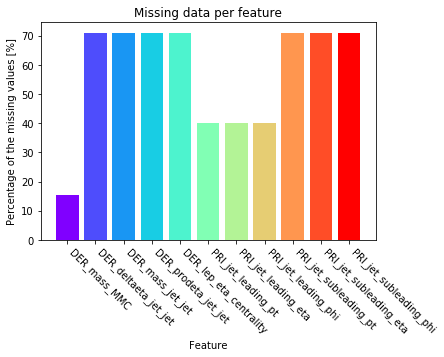

In [47]:
# Lets visualize the results:
n = len(missing_values.keys()) # number of bars 
    
plt.bar(missing_values.keys(), missing_values.values(), align = 'center', color=plt.cm.rainbow(np.linspace(0, 1, n)))
plt.xticks(rotation = -45, ha = 'left')
plt.title('Missing data per feature')
plt.ylabel('Percentage of the missing values [%]')
plt.xlabel('Feature')
plt.show()



The graph above shows that 11 columns (out of 30 that represent features) contain missing values. Specifically in seven columns the amount of missing values is 70 % while in 3 columns is around 40%. 

A great way to get started exploring the features is with histograms. For the sake of simplicity and in order to have a first quick overview of our data we selected a constant number of bins for all the plots.

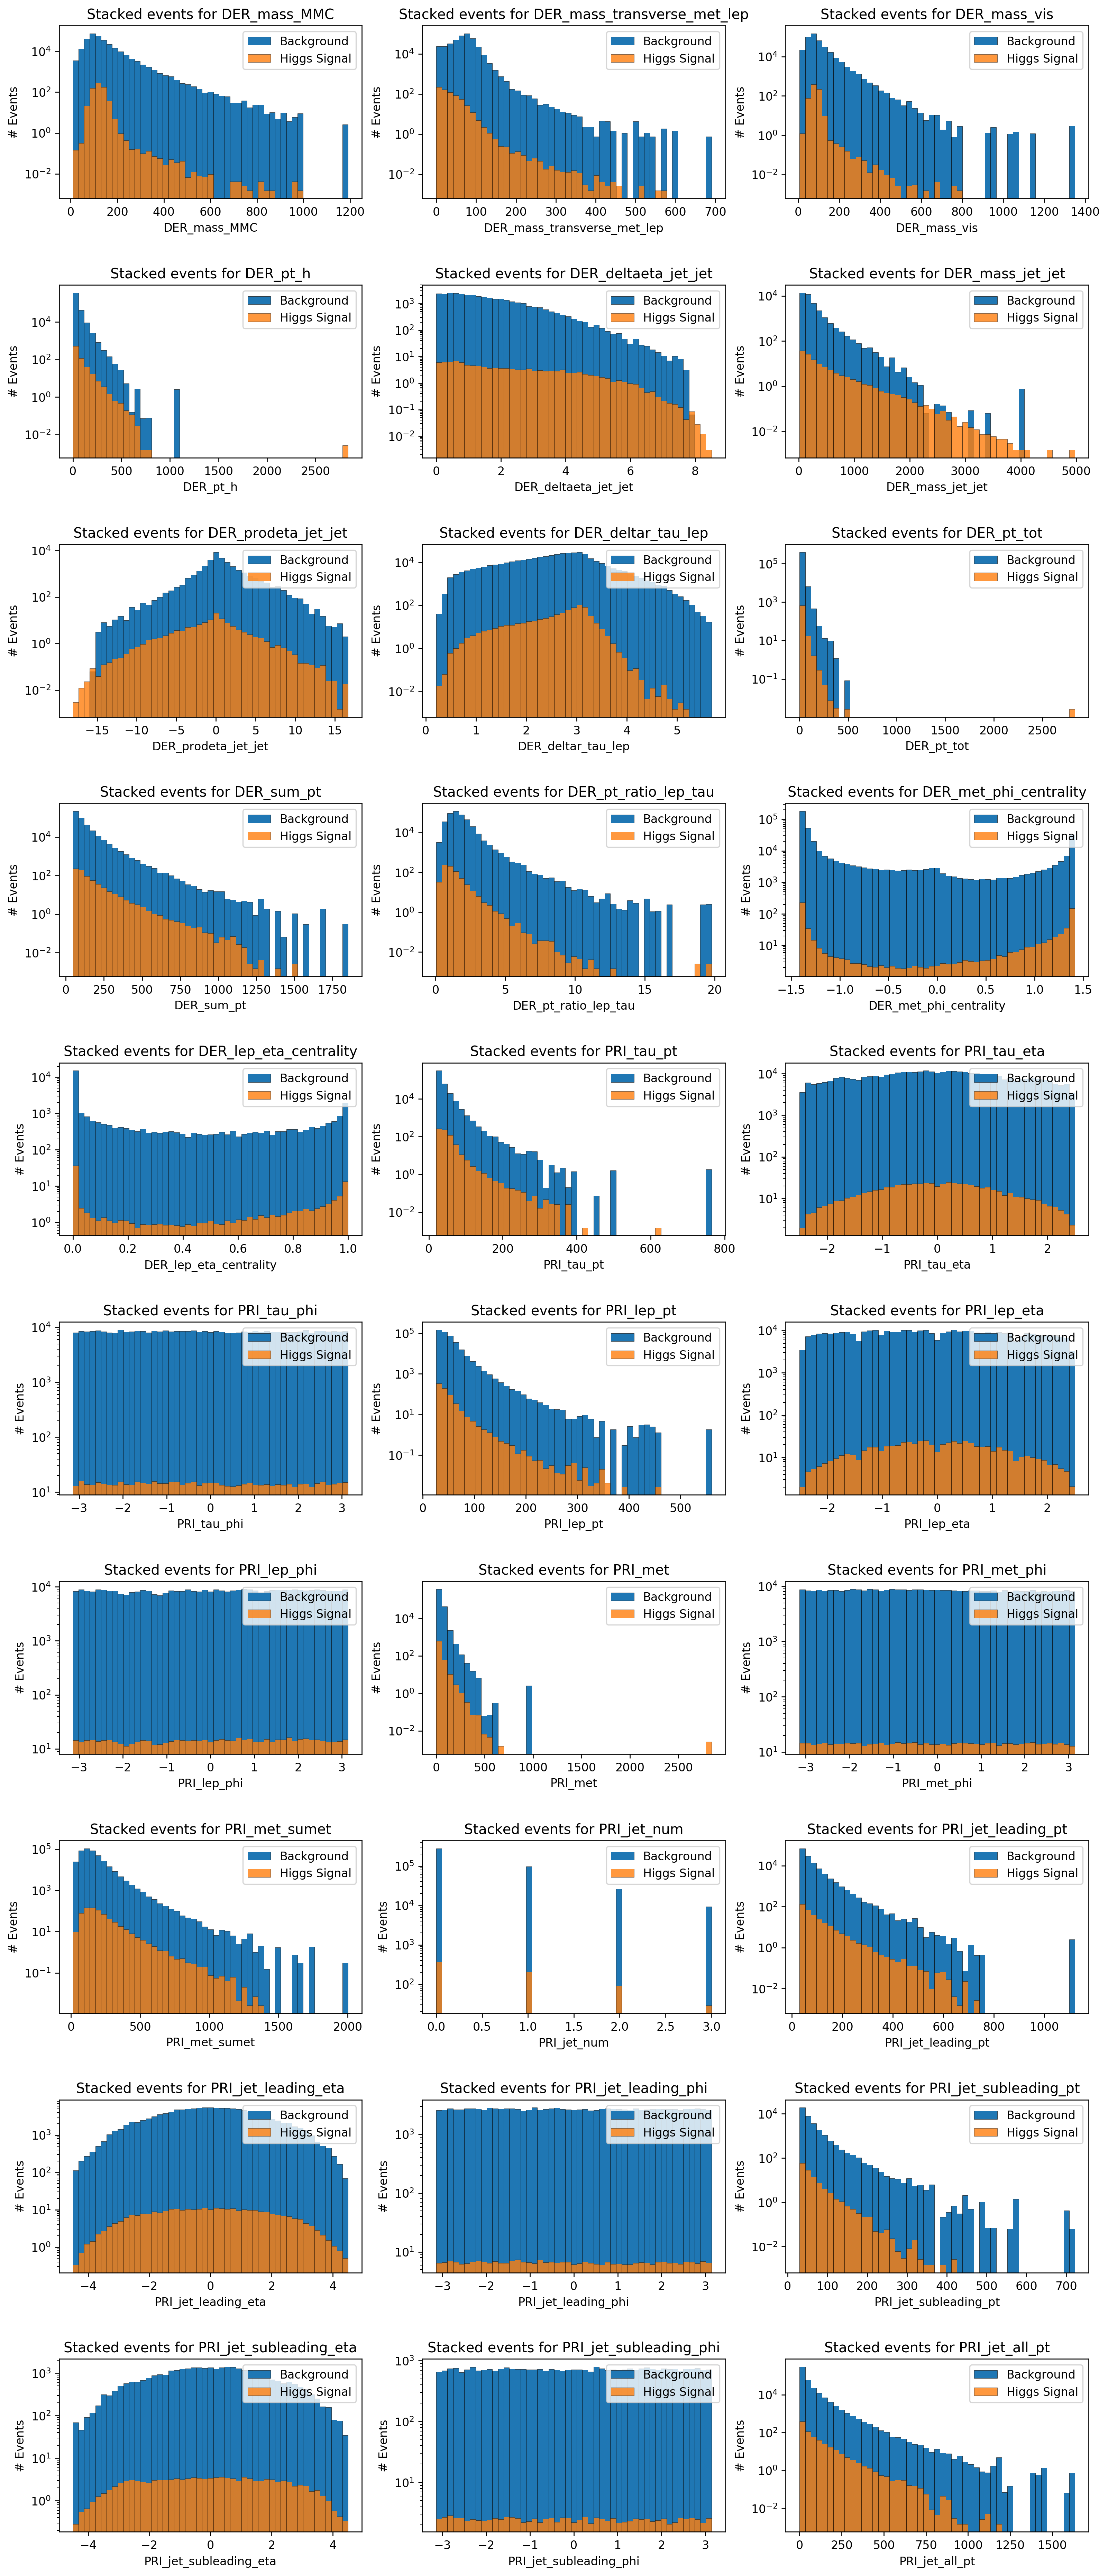

In [50]:
# get all the columns that contain features
feature_df = train.drop(['EventId', 'Weight', 'Label', 'KaggleSet', 'KaggleWeight'], axis=1)
feature_names = feature_df.columns

weights_s = train['KaggleWeight'].loc[train['Label'] == 's'] # weights of the signal events
weights_b = train['KaggleWeight'].loc[train['Label'] == 'b'] # weights of the background events


fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(16,40), dpi=240)
fig.subplots_adjust(hspace=0.5)

n_col = 0 # column indicator

for row in ax:
    for col in row:
        '''Create a histogram for each feature'''
        
        # split into two datasets with singal and background events 
        train_b = train[str(feature_names[n_col])].loc[train['Label'] == 'b']
        train_s = train[str(feature_names[n_col])].loc[train['Label'] == 's']

        #The range of the two histograms (signal and background) must have the same range so that the bins matches.
        range_min = min(train[str(feature_names[n_col])].loc[train[str(feature_names[n_col])] != -999])
        range_max = max(train[str(feature_names[n_col])])

               
        col.hist(train_b, bins=49, weights=weights_b, label='Background', \
                 range=[range_min, range_max], edgecolor = 'black', linewidth=0.2)
        
        col.hist(train_s, bins=49, weights=weights_s, label='Higgs Signal', \
                 range=[range_min, range_max], alpha=0.8, edgecolor='black', linewidth=0.2)
        
        col.set_title('Stacked events for ' + str(feature_names[n_col]))
        col.set_ylabel('# Events')
        col.set_xlabel(str(feature_names[n_col]))
        col.legend(loc = 'upper right')
        col.set_yscale('log')
        
        n_col += 1 # move on to the next feature

plt.show()

As we can observe, we did not include the missing values in the histograms but there are some outliers. We will get rid of these abnormal observations by reducing the range of the histograms. 
In general  the outliers can contain valuable information about the data gathering and the recording process. One should try to understand why they appeared and whether it is likely similar values will continue to appear. 

In the graphs below, the outliers that we could detect observing the histograms are eliminated.  Of course other more sophisticated methods could be applied as well (z-score, ICR score e.t.c.) .

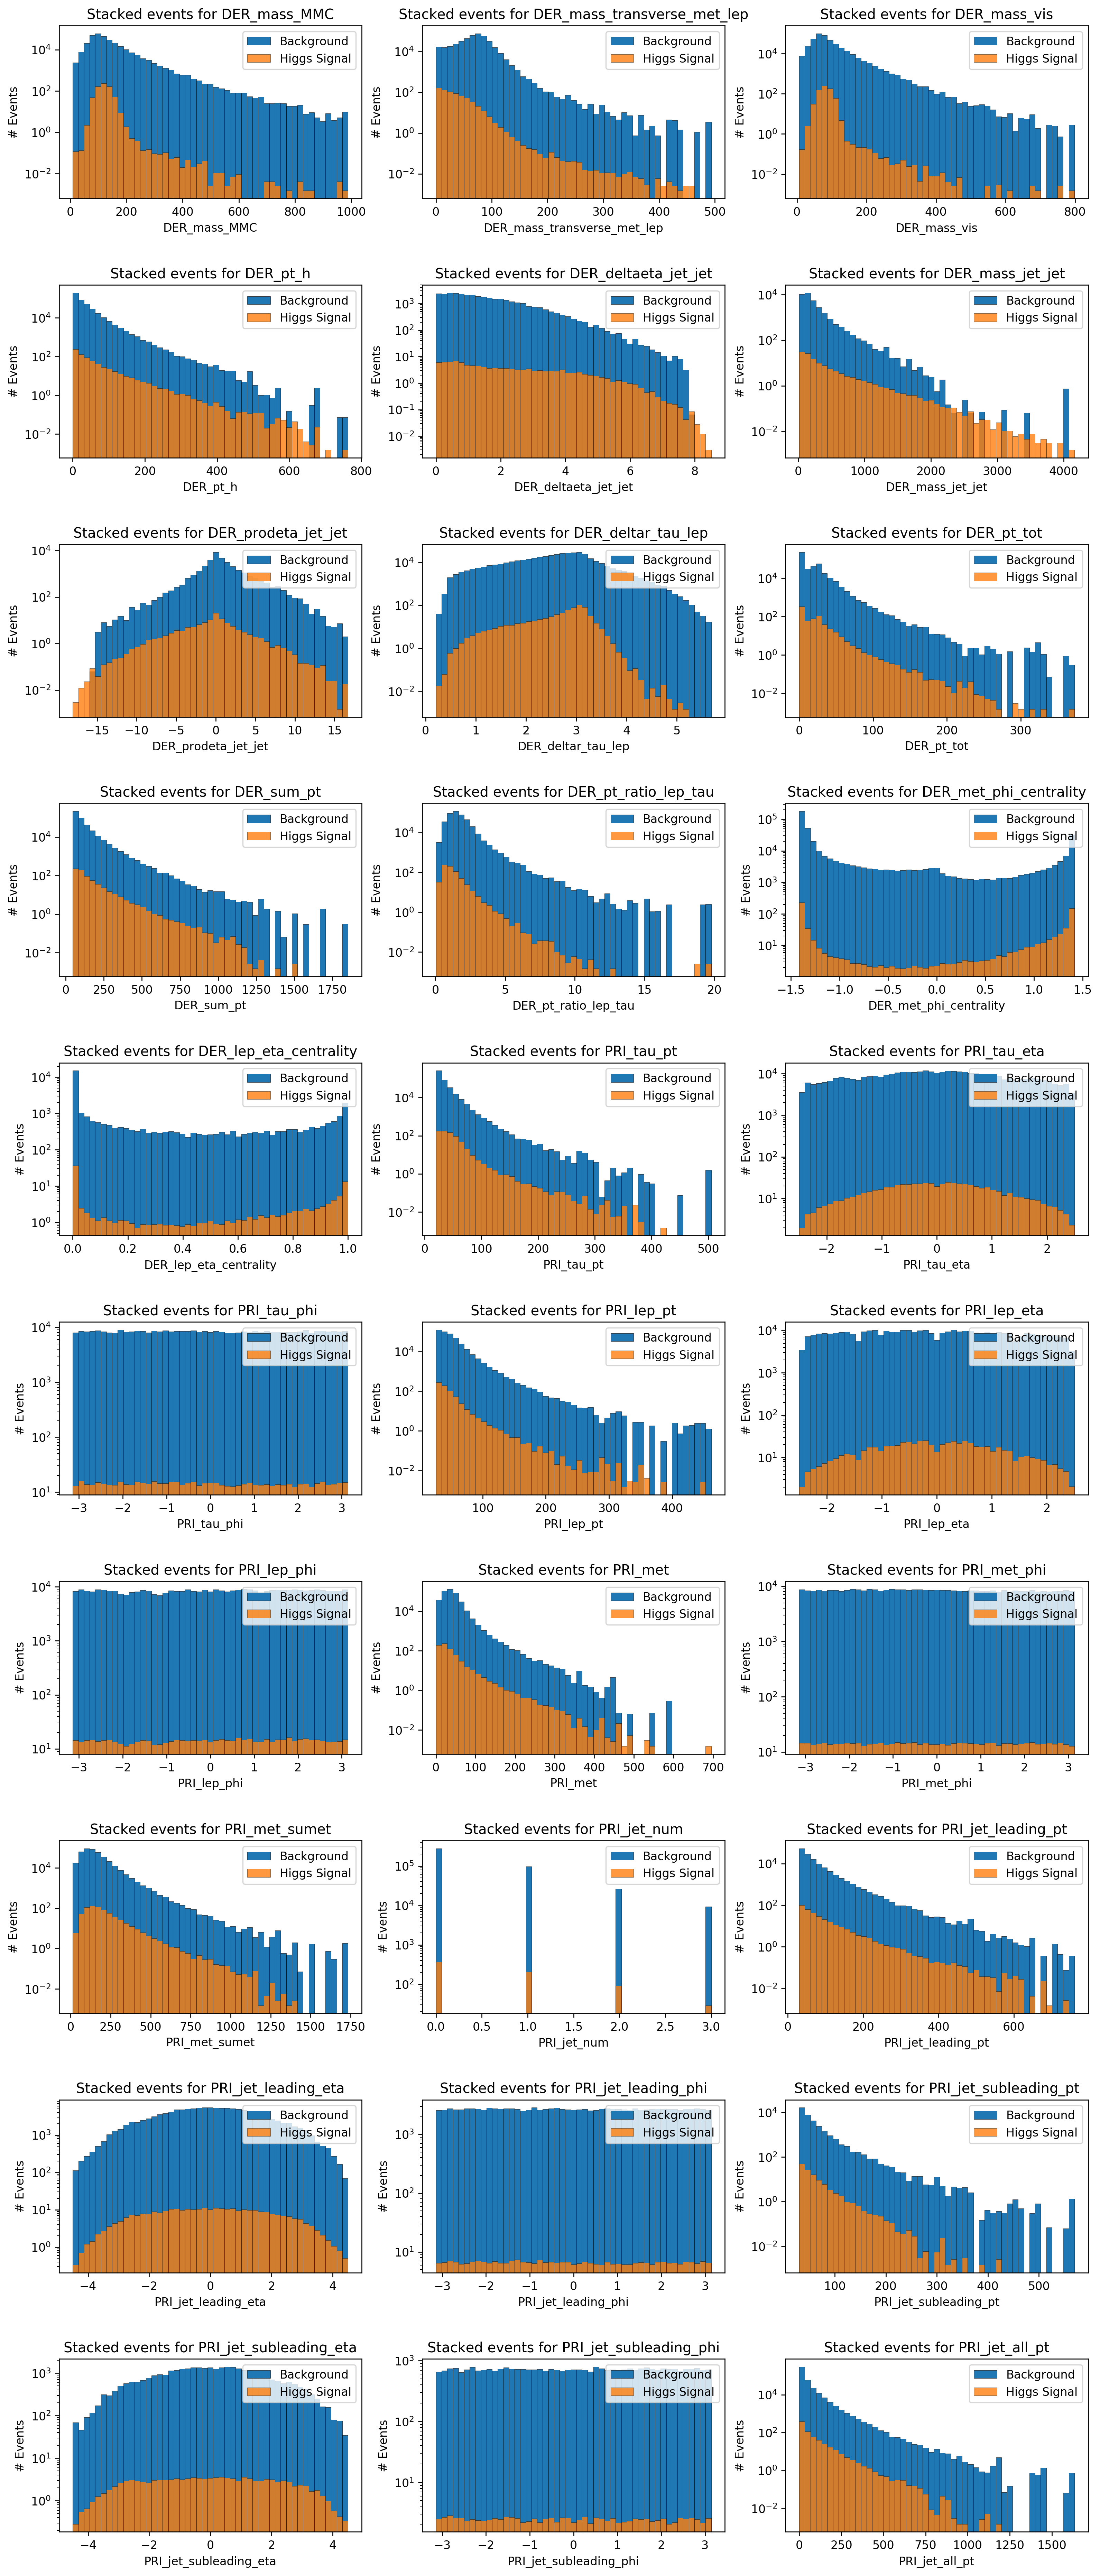

In [52]:
# Values grater than the values in the outlier list are considered as outliers.
# These values result from a visual observation of the histograms above.
# Each value corresponds to a feature. 
outliers = [1000, 500, 900, 1000, 10, 4200, 20, 10, 400, 2000, 20, 2, 2, 600, 3, 4, 500, 3, 4, \
            800, 4, 2000, 4, 1000, 5, 4, 600, 5, 4, 2000]


fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(16,40), dpi=240)
fig.subplots_adjust(hspace=0.5)
n_col = 0
for row in ax:
    for col in row:
        '''Create a histogram for each feature'''
        
        # split into two datasets with singal and background events 
        train_b = train[str(feature_names[n_col])].loc[train['Label']=='b']
        train_s = train[str(feature_names[n_col])].loc[train['Label']=='s']

        #The range of the two histograms (signal and background) must have the same range so that the bins matches.
        range_min = min(train[str(feature_names[n_col])].loc[train[str(feature_names[n_col])] != -999.000])
        range_max = max(train[str(feature_names[n_col])].loc[train[str(feature_names[n_col])] < outliers[n_col]])

       
        col.set_yscale('log')
        col.hist(train_b, bins=49, weights=weights_b, label='Background', range=[range_min, range_max], \
                 edgecolor='black', linewidth=0.2)
        
        col.hist(train_s, bins=49, weights=weights_s, label='Higgs Signal', range=[range_min, range_max], \
                 alpha=0.8, edgecolor='black', linewidth=0.2)
        
        col.set_title('Stacked events for ' + str(feature_names[n_col]))
        col.set_ylabel('# Events')
        col.set_xlabel(str(feature_names[n_col]))
        col.legend(loc = 'upper right')
        
        n_col += 1 # move on to the next feature

plt.show()

Now the histograms look a bit better without the outliers. Observing the histograms it is clear that there are 5 features whose plots are very different from the others. These are the 5 phi angle features, which are identically distributed over the range for both the signal and background. We don’t expect these features to have a strong correlation with the labels (in other words, they don’t give good information for the classification.

To compare the distribution of the Higgs Signal and the Background events we will create density plots. Specifically the kernel density estimation (kde) method based on Gaussian kernels will be used. 

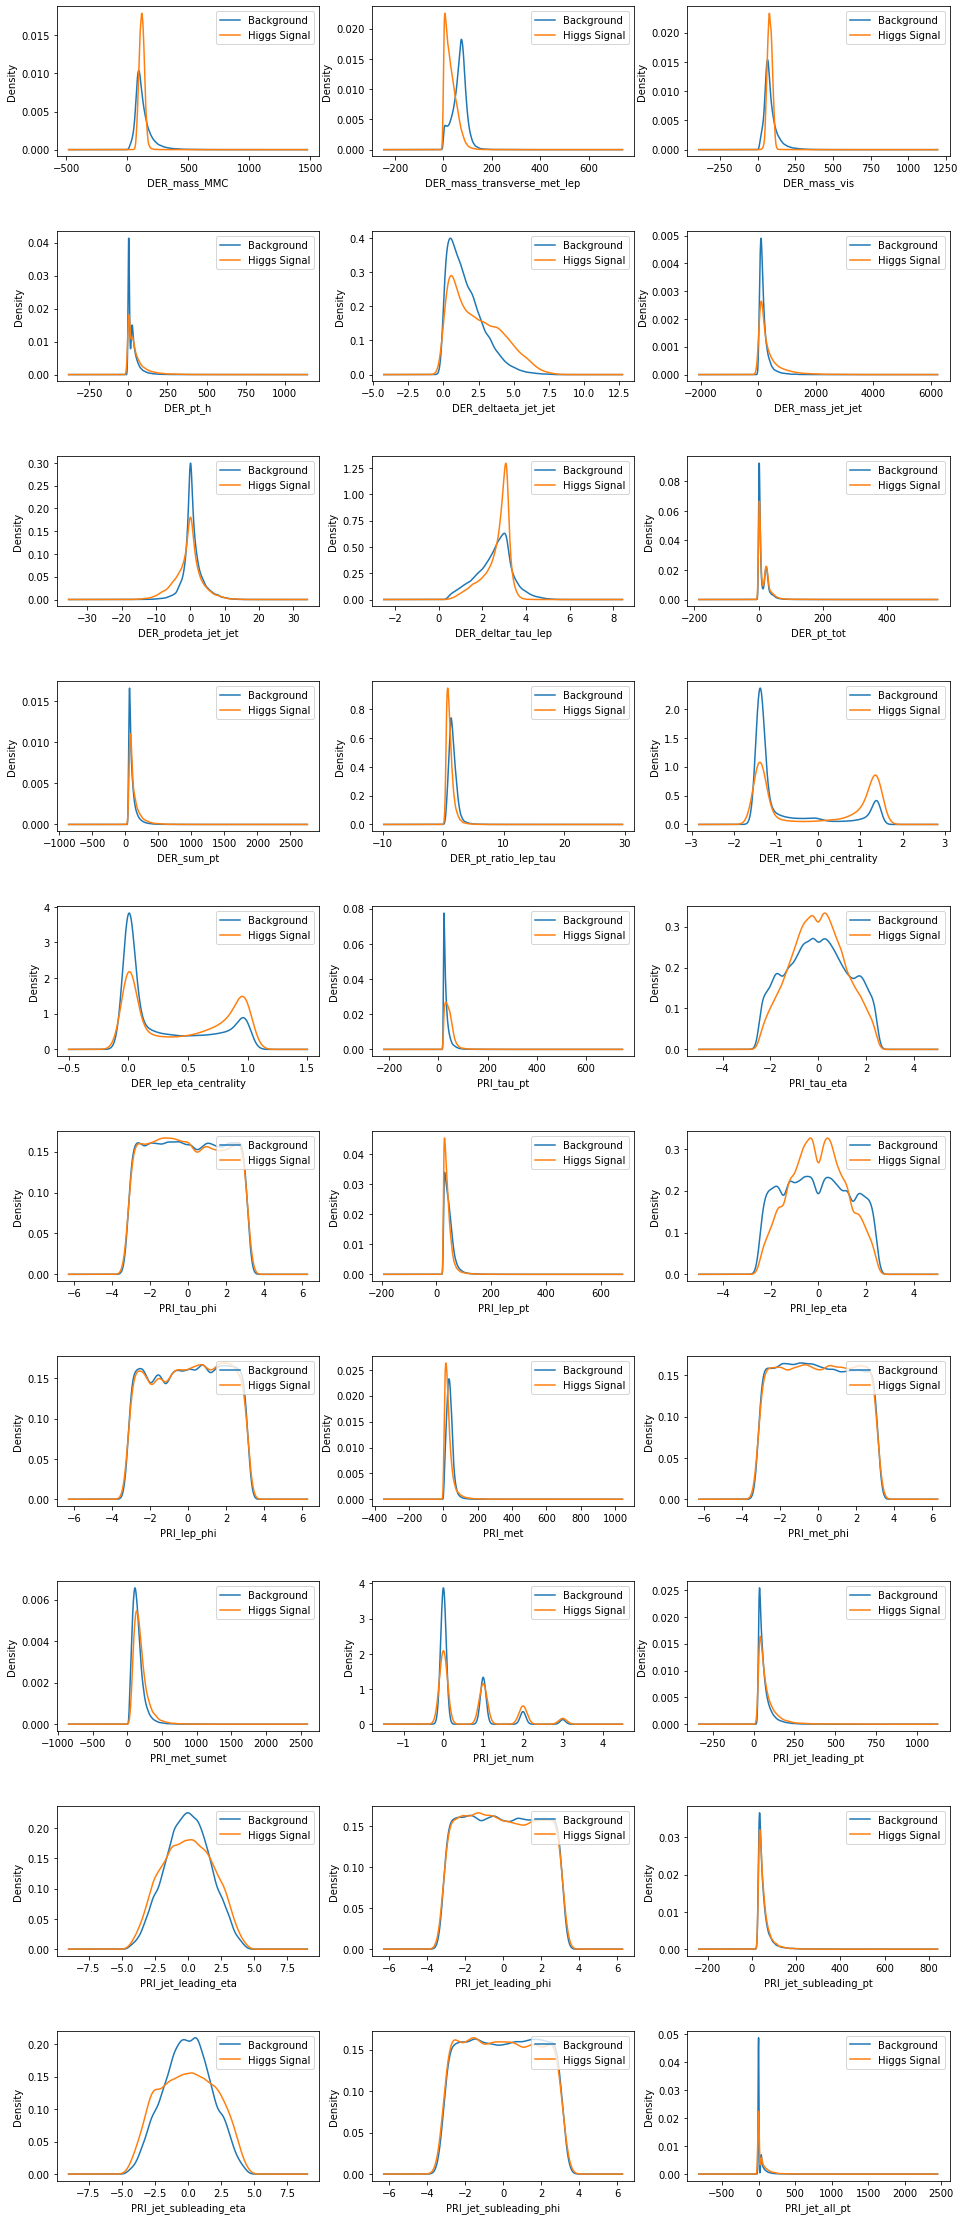

In [53]:
from scipy import stats

features_df = train.drop(['EventId', 'Weight', 'Label', 'KaggleSet', 'KaggleWeight'], axis=1)
features = features_df.columns

fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(16,40), dpi=240)
fig.subplots_adjust(hspace=0.5)
n_col = 0
for row in ax:
    for col in row:
        train_col = train.loc[train[str(feature_names[n_col])] != -999.000]
        train_col = train_col.loc[train_col[str(feature_names[n_col])] < outliers[n_col]]
               
        train_b = train_col[str(feature_names[n_col])].loc[train_col['Label']=='b']
        train_s = train_col[str(feature_names[n_col])].loc[train_col['Label']=='s']
       
        weights_s = train_col['KaggleWeight'].loc[train_col['Label']=='s']
        weights_b = train_col['KaggleWeight'].loc[train_col['Label']=='b']

        range_min = min(train_col[str(feature_names[n_col])])
        range_max = max(train_col[str(feature_names[n_col])])

        kernel1 = stats.gaussian_kde(train_b, weights=weights_b)
        kernel2 = stats.gaussian_kde(train_s, weights=weights_s)

        space = (range_max-range_min)/2
        positions = np.linspace(range_min - space, range_max + space, 1000)
        
        col.plot(positions, kernel1(positions), label='Background')
        col.plot(positions, kernel2(positions), label='Higgs Signal')
        col.set_xlabel(str(feature_names[n_col]))
        col.set_ylabel('Density')
        col.legend(loc='upper right')
        
        n_col +=1

plt.show()

Since some distributions are not clear enough due to the big x-range of the plots we will reduce the visible range in x axis. 

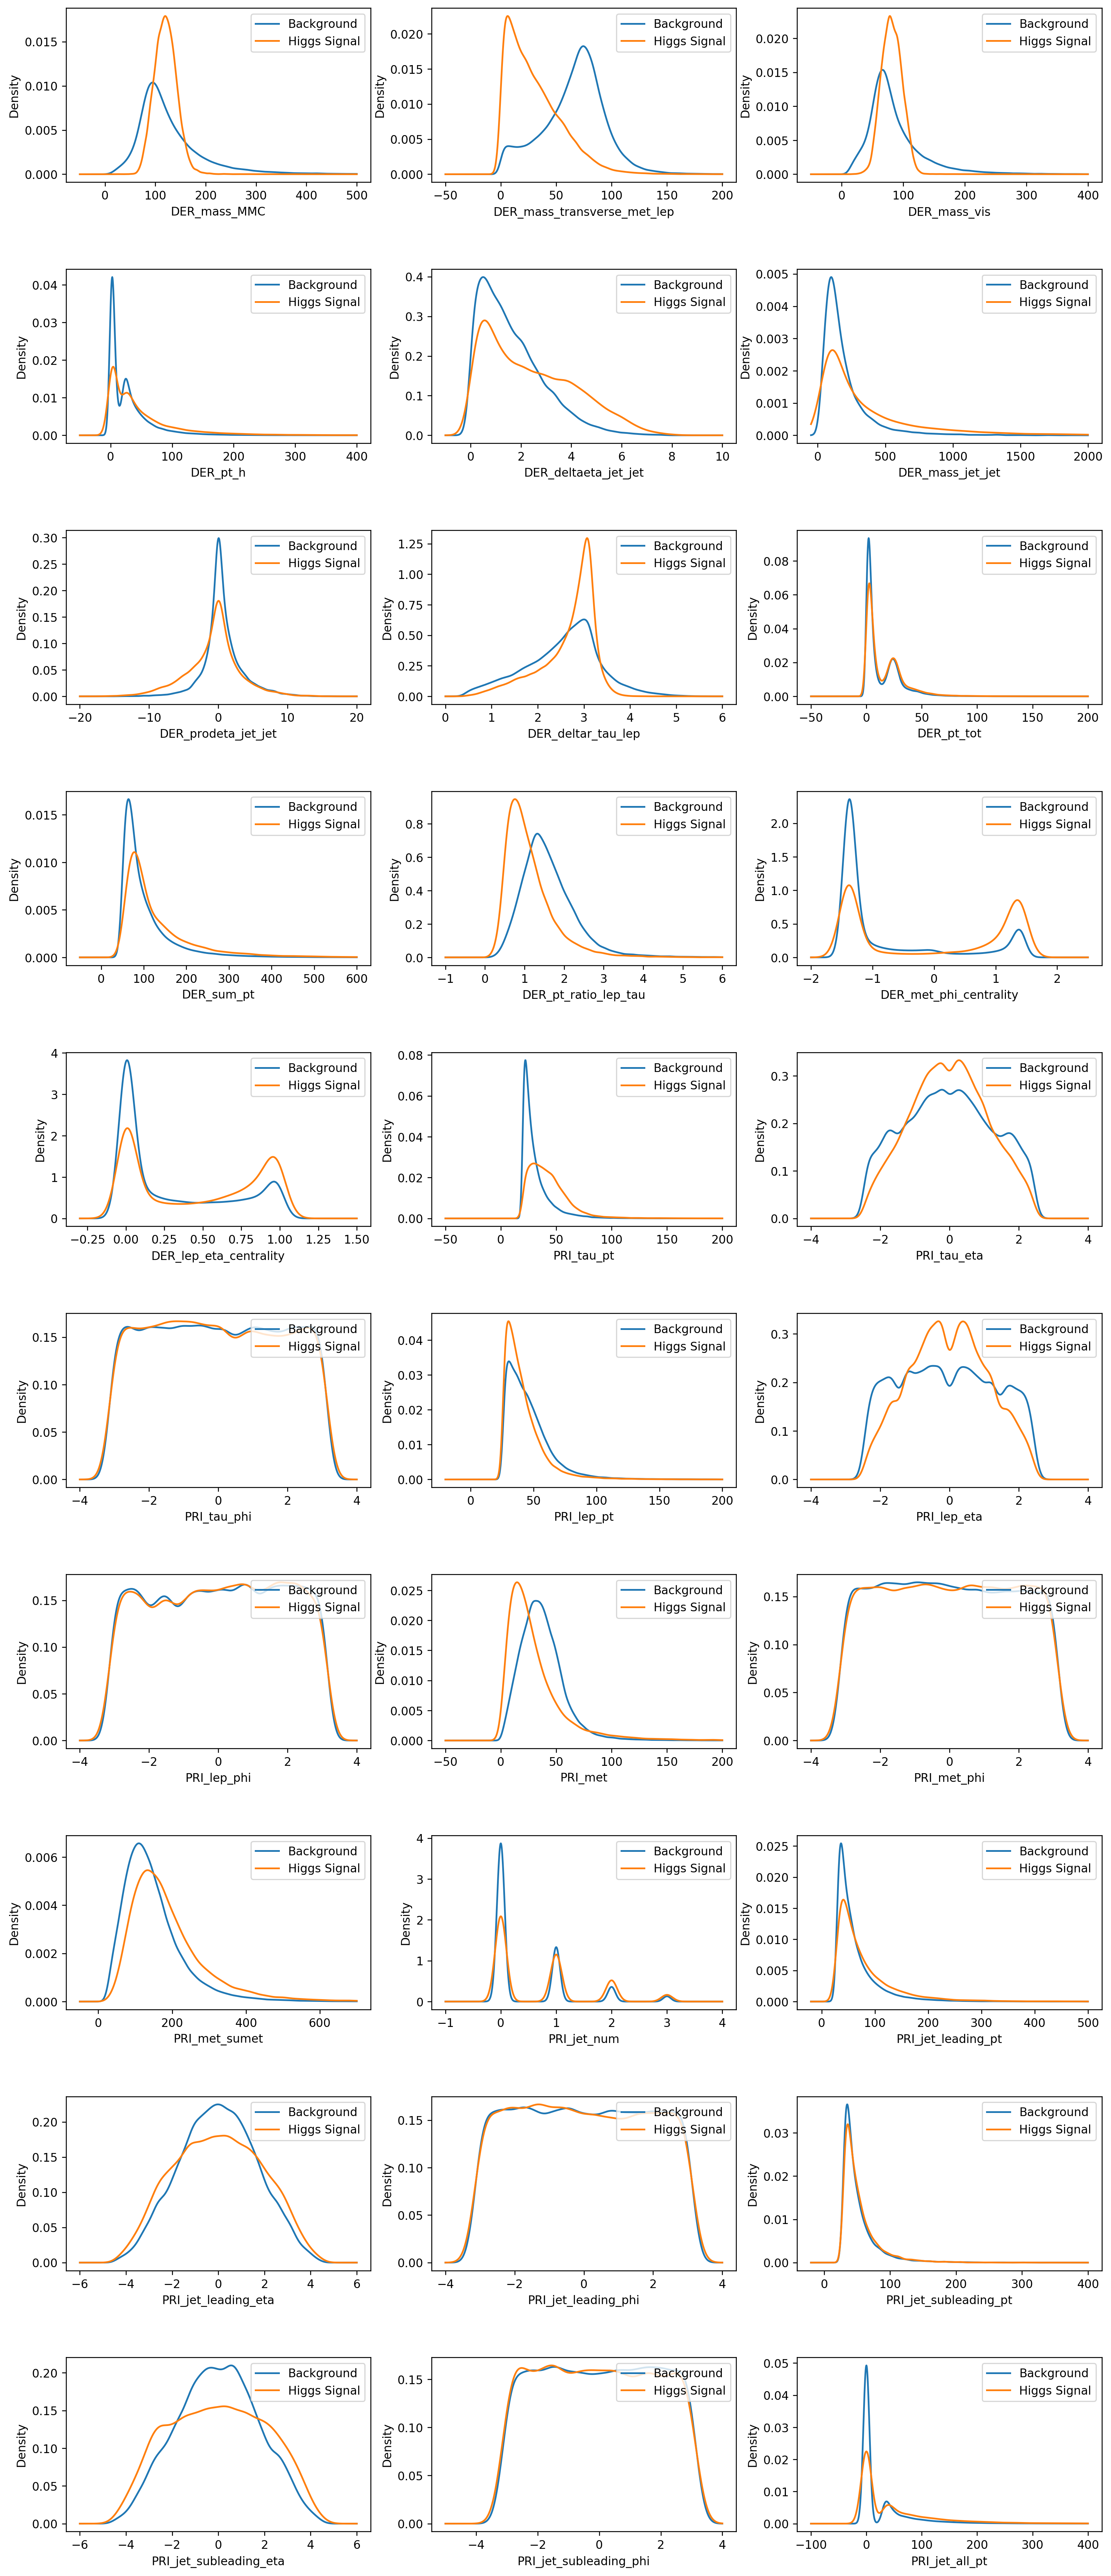

In [54]:
xrange_min = [-50, -50, -50, -50, -1, -50, -20, 0, -50, -50, -1, -2, -0.3, -50, -4, -4, -20, -4, -4, -50, -4, -50,\
              -1, -20, -6, -4, -20, -6, -5, -100]
xrange_max = [500, 200, 400, 400, 10, 2000, 20, 6, 200, 600, 6, 2.5, 1.5, 200, 4, 4, 200, 4, 4, 200, 4, 700, 4, 500,\
              6, 4, 400, 6, 4, 400]

fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(16,40), dpi=240)
fig.subplots_adjust(hspace=0.5)
n_col = 0
for row in ax:
    for col in row:
        train_col = train.loc[train[str(feature_names[n_col])] != -999.000]
        train_col = train_col.loc[train_col[str(feature_names[n_col])] < outliers[n_col]]
               
        train_b = train_col[str(feature_names[n_col])].loc[train_col['Label']=='b']
        train_s = train_col[str(feature_names[n_col])].loc[train_col['Label']=='s']
       
        weights_s = train_col['KaggleWeight'].loc[train_col['Label']=='s']
        weights_b = train_col['KaggleWeight'].loc[train_col['Label']=='b']
  
        kernel1 = stats.gaussian_kde(train_b, weights=weights_b)
        kernel2 = stats.gaussian_kde(train_s, weights=weights_s)
    
        positions = np.linspace(xrange_min[n_col], xrange_max[n_col], 1000)
        
        col.plot(positions, kernel1(positions), label='Background')
        col.plot(positions, kernel2(positions), label='Higgs Signal')
        col.set_xlabel(str(feature_names[n_col]))
        col.set_ylabel('Density')
        col.legend(loc='upper right')
     
        
        n_col +=1

plt.show()

As we noticed earlier, the 5 phi features are not good for predictions since their distributions for the signal and background noise are uniform.  Regarding the eta features, we don’t expect to influence a lot the result. Their distribution is not strictly uniform but in same cases it’s quite broad and the central peaks tends to be the same for the signal and background noise. The distribution, whose peaks can be distinguished easily are expected to be advantageous for predictions. An example is the ‘DER_mass_MMC’ feature that represents the estimated mass of the Higgs boson.  The peak of the Higgs signal is at 125 GeV while the peak of the background noise is at 96 GeV (The biggest contributor is the Z boson). 

Additionally, a good way for feature reduction is the principal component analysis (PCA). Most likely the PCA would also show a strong relation between the derived mass and the label. 
Also, a good way to visualize the correlation between the features would be with a heatmap. 